# **Import libraries**

In [10]:
import kagglehub  # to download dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Removing the warnings
import warnings
warnings.filterwarnings("ignore") 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# **1. Load Dataset**

In [11]:
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

train_df = pd.read_csv(path + "/mnist_train.csv")
test_df = pd.read_csv(path + "/mnist_test.csv")

# Features and labels
X_train = train_df.iloc[:, 1:].values / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# **2. Build Neural Network**

In [12]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),   # hidden layer
    Dropout(0.3),                                        # dropout
    Dense(128, activation='relu'),                       # another hidden layer
    Dropout(0.3),
    Dense(10, activation='softmax')                      # output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# **3. Train Model**

In [13]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7840 - loss: 0.6897 - val_accuracy: 0.9672 - val_loss: 0.1232
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9432 - loss: 0.1884 - val_accuracy: 0.9728 - val_loss: 0.0931
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9589 - loss: 0.1353 - val_accuracy: 0.9775 - val_loss: 0.0809
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9691 - loss: 0.1041 - val_accuracy: 0.9772 - val_loss: 0.0728
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0923 - val_accuracy: 0.9818 - val_loss: 0.0681
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0828 - val_accuracy: 0.9823 - val_loss: 0.0642
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0711 - val_accuracy: 0.9825 - val_loss: 0.0670
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.0602 - val_accuracy: 0.

# **4. Evaluate Model**

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9816
Test Loss: 0.0678


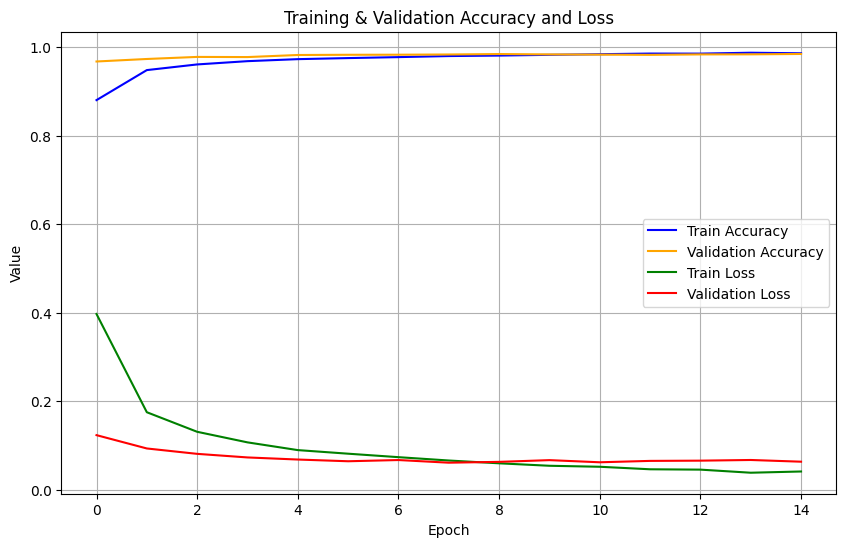

In [18]:
# Combined Accuracy + Loss Plot
plt.figure(figsize=(10,6))

# Accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Loss curves
plt.plot(history.history['loss'], label='Train Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title("Training & Validation Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# **5. Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


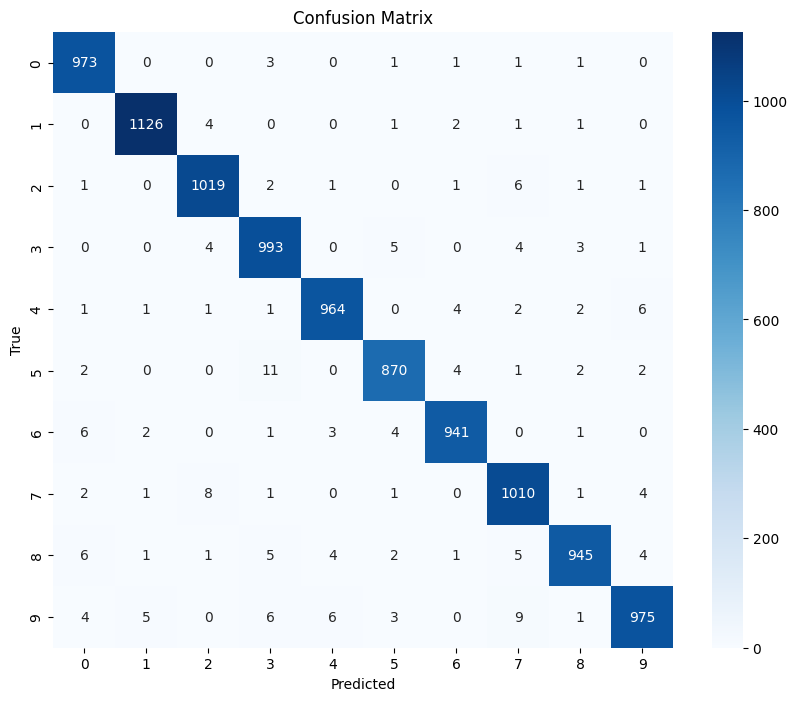

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# -------------------------
# Confusion Matrix
# -------------------------
# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)   # predicted labels
y_true = y_test.argmax(axis=1)         # true labels

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -------------------------
# Classification Report
# -------------------------
print("Classification Report:")
print(classification_report(y_true, y_pred))

# **6. Visualize Training**

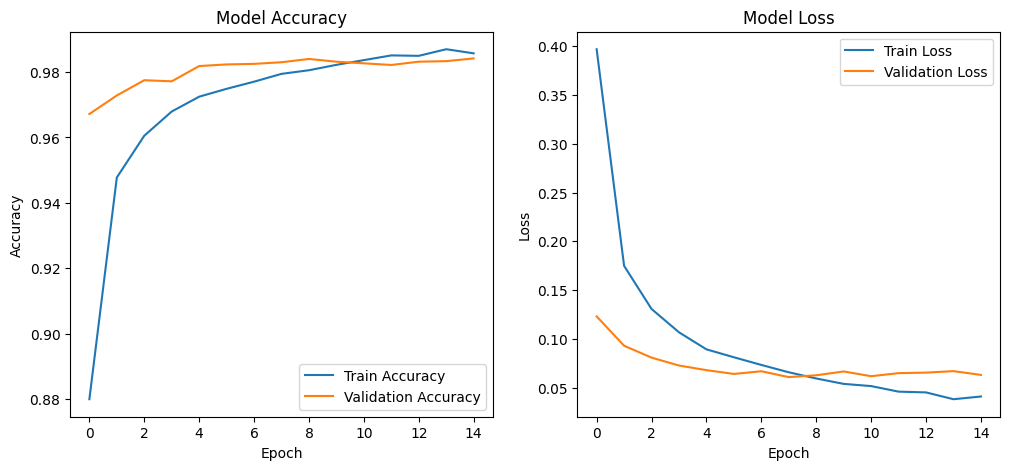

In [16]:
plt.figure(figsize=(12,5))

# Accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **Build and Train a Neural Network with Keras/TensorFlow**

# **🔹 Step 1: Dataset (MNIST in CSV)**

The dataset comes from Kaggle (oddrationale/mnist-in-csv).

It contains handwritten digits (0–9) in CSV format instead of image files.

Each row in the training file has:

First column → the label (digit: 0–9).

Next 784 columns → pixel values (28×28 image, flattened).

We load the dataset and normalize pixel values by dividing by 255, so all values are in the range [0,1].

# **🔹 Step 2: Preprocessing**

X (features): 784 pixel values for each digit.

y (labels): the digit (0–9).

Labels are converted to one-hot encoding (e.g., digit 3 → [0,0,0,1,0,0,0,0,0,0]).

This makes it easier for the neural network to learn classification.

# **🔹 Step 3: Neural Network Design**

We build a feedforward neural network (MLP) with Keras/TensorFlow:

Input layer:

784 inputs (28×28 pixels).

Hidden Layer(s):

At least one dense (fully connected) hidden layer with ReLU activation.

Example: 256 neurons → learns complex features of digits.

Dropout Layers:

Added after hidden layers (e.g., 30% dropout).

Prevents overfitting by randomly turning off neurons during training.

Output Layer:

10 neurons (for digits 0–9).

Softmax activation → gives probability distribution across classes.

# **🔹 Step 4: Compilation**

Optimizer: Adam → adaptive gradient-based optimization.

Loss Function: Categorical Crossentropy → best for multi-class classification.

Metrics: Accuracy (to monitor performance).

# **🔹 Step 5: Training**

Model is trained using training data (X_train, y_train).

Batch size: number of samples processed before updating weights (e.g., 128).

Epochs: how many times the model sees the entire dataset (e.g., 15 epochs).

Validation split: part of training data (10%) used for validation accuracy/loss.

**During training:**

We track loss (error) and accuracy for both training and validation.

The model improves with each epoch.

# **🔹 Step 6: Evaluation**

After training, the model is tested on unseen test data (X_test, y_test).

Outputs:

Test Accuracy → how well the model predicts digits.

Test Loss → final error value.

Normally, accuracy is around 97–98%.

# **🔹 Step 7: Visualization**

We plot training history:

Accuracy curve: shows how training & validation accuracy improve per epoch.

Loss curve: shows how training & validation loss decreases.

✅ If curves look smooth & validation accuracy is high → model is good.

⚠ If training accuracy >> validation accuracy → overfitting (fix with dropout/regularization).

# **🔹 Final Deliverables**

Trained Neural Network model (Keras/TensorFlow).

Evaluation results (accuracy & loss on test data).

Plots of training/validation accuracy and loss.